(100, 402)


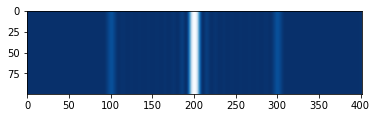

Text(0.5, 1.0, ' Intensity of Light in a Diffraction Grating')

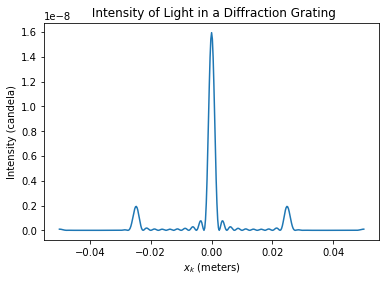

In [35]:
import numpy as np
from numpy import pi, sin
from numpy.fft import fft, rfft
import matplotlib.pyplot as plt

# Constants from Newman converted to meters

slit_width = 2e-5 # meters
w = 2e-4 # meters
W = 10*w # meters
wavelength = 5e-7 # meters
f = 1 # meters
screen_wide = 0.1 # meters
alpha = pi/slit_width


# creating n, N and un

N = 1000
n = np.arange(0,N,1)
un = (n*W)/N - W/2


# creating q(u) function
# Formula from exercise 5.19 - Diffraction gradient.
# for diffraction grates, we will ignore certain wavelengths as they are blocked.

def q(u):
    if abs(u) > w/2:
        return 0
    else:
        return (sin(alpha * u))**2


# creating the yn function
# because of q(u) using abs(u), I need to enter each un point individually.
y_n = np.empty(N)
for i in range(N):
    u = un[i]
    y_n[i] = np.sqrt( q(u) )
    
    
# Fourier transforming y_n to get the coefficents ck and calculating xk
# Note: all our values are real, so we can use rfft.

c_k = np.fft.rfft(y_n)
k = np.arange(0,len(c_k),1)
Intensity = ( W**2 / N**2 ) * ( np.abs(c_k) )**2
# Now, we need to replicate our intensity pattern from 0 to 5 cm so we splice our array
# Then we replicate it from -5 to 0 cm, then combine the two. Which is what we do below.
# Note: because of the way we defined our x_k array, the 200th point is 5cm, so we splice
# at 201. Then we copy and flip this. To get the full array from -5 to 5.
positive_x_k = (wavelength*f/W)*k
positive_x_k = positive_x_k[:201]  #only delete this line later; when you properly accomplish the -5<x<5cm range
negative_x_k = positive_x_k[1:]*-1
negative_x_k = negative_x_k[::-1]
x_k = np.concatenate((negative_x_k, positive_x_k))


# Now, to create the diffraction pattern, we need to make the Intensity
# array 2 dimensional. The horizontal axis represents the range -5cm to 5cm
# the vertical array is the focal length (1 meter = 100 cm)
# Since it is an intensity array, we need to make the 2D intensity array and since the
# vertical axis is 100cm, it is 100 points

# Predefining our empty intensity array (we will calculate intensity from 0 to 5cm, flip it then combine to get
# the full intensity array).
num_points = len(positive_x_k)
I = np.empty([100, 2 * num_points], float)
print(np.shape(I))
for i in range(100):
    I[i, 0 : num_points] = Intensity[0: num_points][::-1]
    I[i, num_points : 2*num_points] = Intensity[0: num_points]

    
# Plotting the Diffraction pattern
plt.imshow(I, 'Blues_r')

plt.show()

# Plotting the function from -5cm to 5cm (Note, had to slice and stitch together the Intensity function)
plt.plot(x_k, np.concatenate((Intensity[1:num_points][::-1], Intensity[0:num_points])))
plt.xlabel("$x_k$ (meters)")
plt.ylabel("Intensity (candela)")
plt.title(" Intensity of Light in a Diffraction Grating")